In [1]:
# Herramientas para EDA
import pandas as pd
import numpy as np
import sidetable as stb
from datetime import timedelta
from datetime import date, datetime
import random 

# Herramientas para la Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec

# Transformación de datos

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Estadísticos
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

plt.rcParams["figure.figsize"] = (16,8)

import warnings
warnings.filterwarnings('ignore')

/Users/DataAnalytics/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/DataAnalytics/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df= pd.read_csv('../archivos/bikes_casuales.csv', index_col=0)
df.head()

,fecha,estacion,año,mes,dias_festivos,dias_laborales,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,0,Nublado,14.110847,18.18125,80.5833,10.749882,331,lunes
1,2018-01-02,invierno,0,1,No Festivo,0,Nublado,14.902598,17.68695,69.6087,16.652113,131,martes
2,2018-01-03,invierno,0,1,No Festivo,1,Soleado,8.050924,9.47025,43.7273,16.636703,120,miercoles
3,2018-01-04,invierno,0,1,No Festivo,1,Soleado,8.200000,10.60610,59.0435,10.739832,108,jueves
4,2018-01-05,invierno,0,1,No Festivo,1,Soleado,9.305237,11.46350,43.6957,12.522300,82,viernes


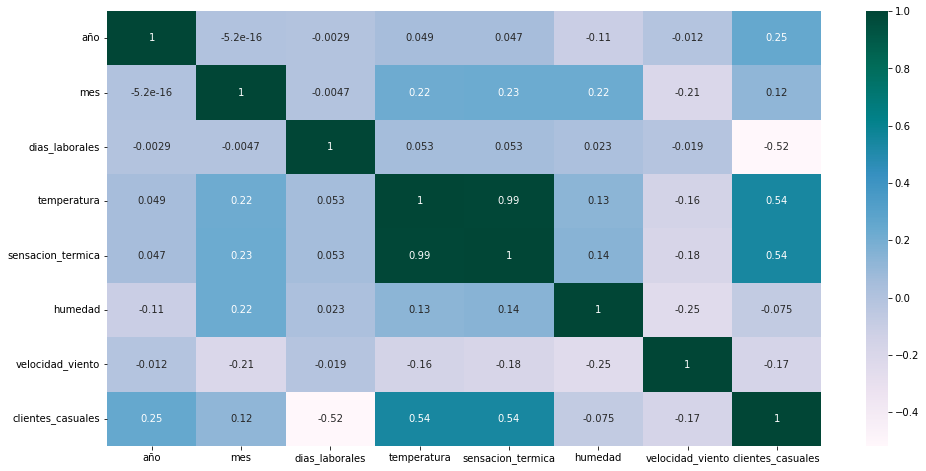

In [3]:
sns.heatmap(df.corr(), cmap= 'PuBuGn', annot= True);

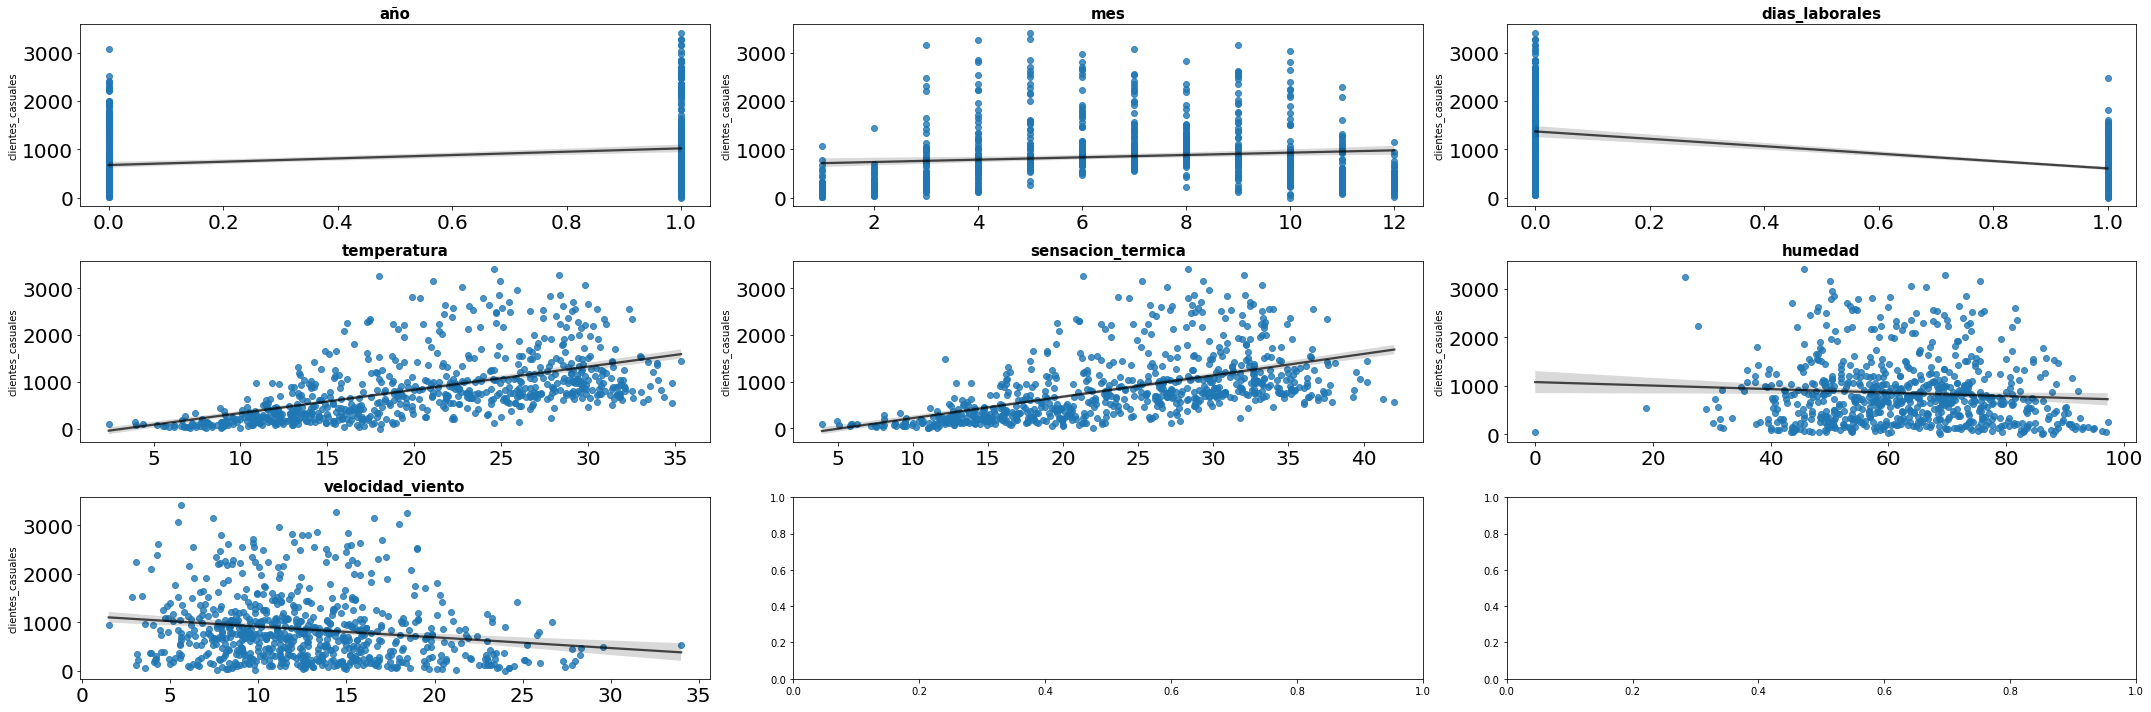

In [4]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 10))

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('clientes_casuales', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'clientes_casuales',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

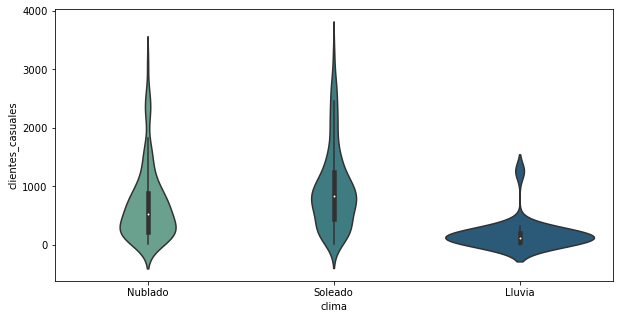

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'clima',
    y       = 'clientes_casuales',
    data    = df,
    palette = 'crest',
    ax      = ax
);

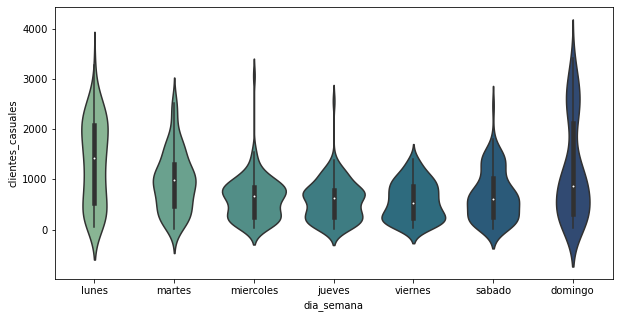

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'dia_semana',
    y       = 'clientes_casuales',
    data    = df,
    palette = 'crest',
    ax      = ax
);

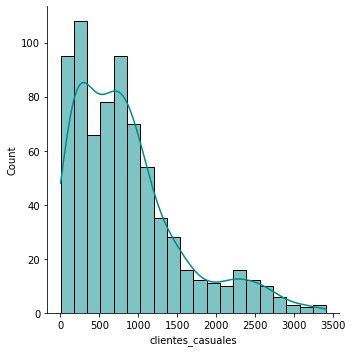

In [8]:
sns.displot(df['clientes_casuales'], kde = True, color = "darkcyan");

In [9]:
stats.shapiro(df['clientes_casuales'])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

In [10]:
lm = ols('clientes_casuales ~ año + mes + dias_festivos + dias_laborales + clima + temperatura + sensacion_termica + humedad + velocidad_viento + dia_semana',  data = df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
dias_festivos,11.0,2.523084e+07,2.293712e+06,16.590106,2.867275e-29
clima,2.0,1.915462e+07,9.577311e+06,69.271373,3.471517e-28
dia_semana,6.0,5.566853e+07,9.278088e+06,67.107135,6.246108e-66
año,1.0,1.948520e+07,1.948520e+07,140.933742,9.361501e-30
mes,1.0,4.751256e+06,4.751256e+06,34.365183,7.024966e-09
dias_laborales,1.0,3.296475e+07,3.296475e+07,238.429492,1.559945e-46
temperatura,1.0,8.553346e+07,8.553346e+07,618.651768,1.881927e-98
sensacion_termica,1.0,6.829449e+05,6.829449e+05,4.939647,2.656480e-02
humedad,1.0,3.675170e+05,3.675170e+05,2.658200,1.034652e-01
velocidad_viento,1.0,2.510235e+06,2.510235e+06,18.156184,2.312400e-05


In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      clientes_casuales   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     68.53
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          3.15e-173
Time:                        14:15:47   Log-Likelihood:                -5342.5
No. Observations:                 730   AIC:                         1.074e+04
Df Residuals:                     703   BIC:                         1.086e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      93.7368    314.492      0.298      0.766    -523.719     711.193
dias_festivos[T.Columbus Day]                1182.7779    377.051      3.137      0.002     442.496    1923.059
dias_festivos[T.Independence Day]            1388.5413    376.728      3.686      0.000     648.894    2128.188
dias_festivos[T.Labor Day]                   1041.2236    377.873      2.755      0.006     299.329    1783.118
dias_festivos[T.Martin Luther King Jr. Day]   -77.7566    379.147     -0.205      0.838    -822.152     666.639
dias_festivos[T.Memorial Day]                1445.8301    379.639      3.808      0.000     700.469    2191.191
dias_festivos[T.New Year's Day]               -33.9136    377.050     -0.090      0.928    -774.193     706.366
dias_festivos[T.No Festivo]                   485.4629    267.937      1.812      0.070     -40.590    1011.516
dias_festivos[T.Thanksgiving]                 482.1162    378.346      1.274      0.203    -260.707    1224.939
dias_festivos[T.Veterans Day]                 582.2852    374.705      1.554      0.121    -153.390    1317.960
dias_festivos[T.Veterans Day (Observed)]      779.0325    459.518      1.695      0.090    -123.159    1681.224
dias_festivos[T.Washington's Birthday]        342.6075    380.592      0.900      0.368    -404.625    1089.840
clima[T.Nublado]                              206.5361     89.330      2.312      0.021      31.150     381.923
clima[T.Soleado]                              299.1890     95.108      3.146      0.002     112.459     485.919
dia_semana[T.jueves]                         -281.7768     56.250     -5.009      0.000    -392.215    -171.338
dia_semana[T.lunes]                          -256.3459     59.438     -4.313      0.000    -373.043    -139.649
dia_semana[T.martes]                         -330.4948     52.501     -6.295      0.000    -433.572    -227.418
dia_semana[T.miercoles]                      -288.1656     54.619     -5.276      0.000    -395.401    -180.930
dia_semana[T.sabado]                         -158.2111     55.740     -2.838      0.005    -267.649     -48.773
dia_semana[T.viernes]                        -271.0977     55.890     -4.851      0.000    -380.828    -161.367
año                                           286.4965     27.884     10.275      0.000     231.751     341.242
mes                                            -1.4748      4.337     -0.340      0.734      -9.989       7.039
dias_laborales                               -783.7357     48.152    -16.276      0.000    -878.274    -689.198
temperatura                                    24.2517     14.680      1.652      0.099      -4.570      53.073
sensacion_termica                              22.3878     